C:\Users\miron\AppData\Local\Temp\ipykernel_7964\21275047.py:51: RuntimeWarning: divide by zero encountered in reciprocal
  omega = pow(np.ravel(0.5 * z * f_abs), -1)


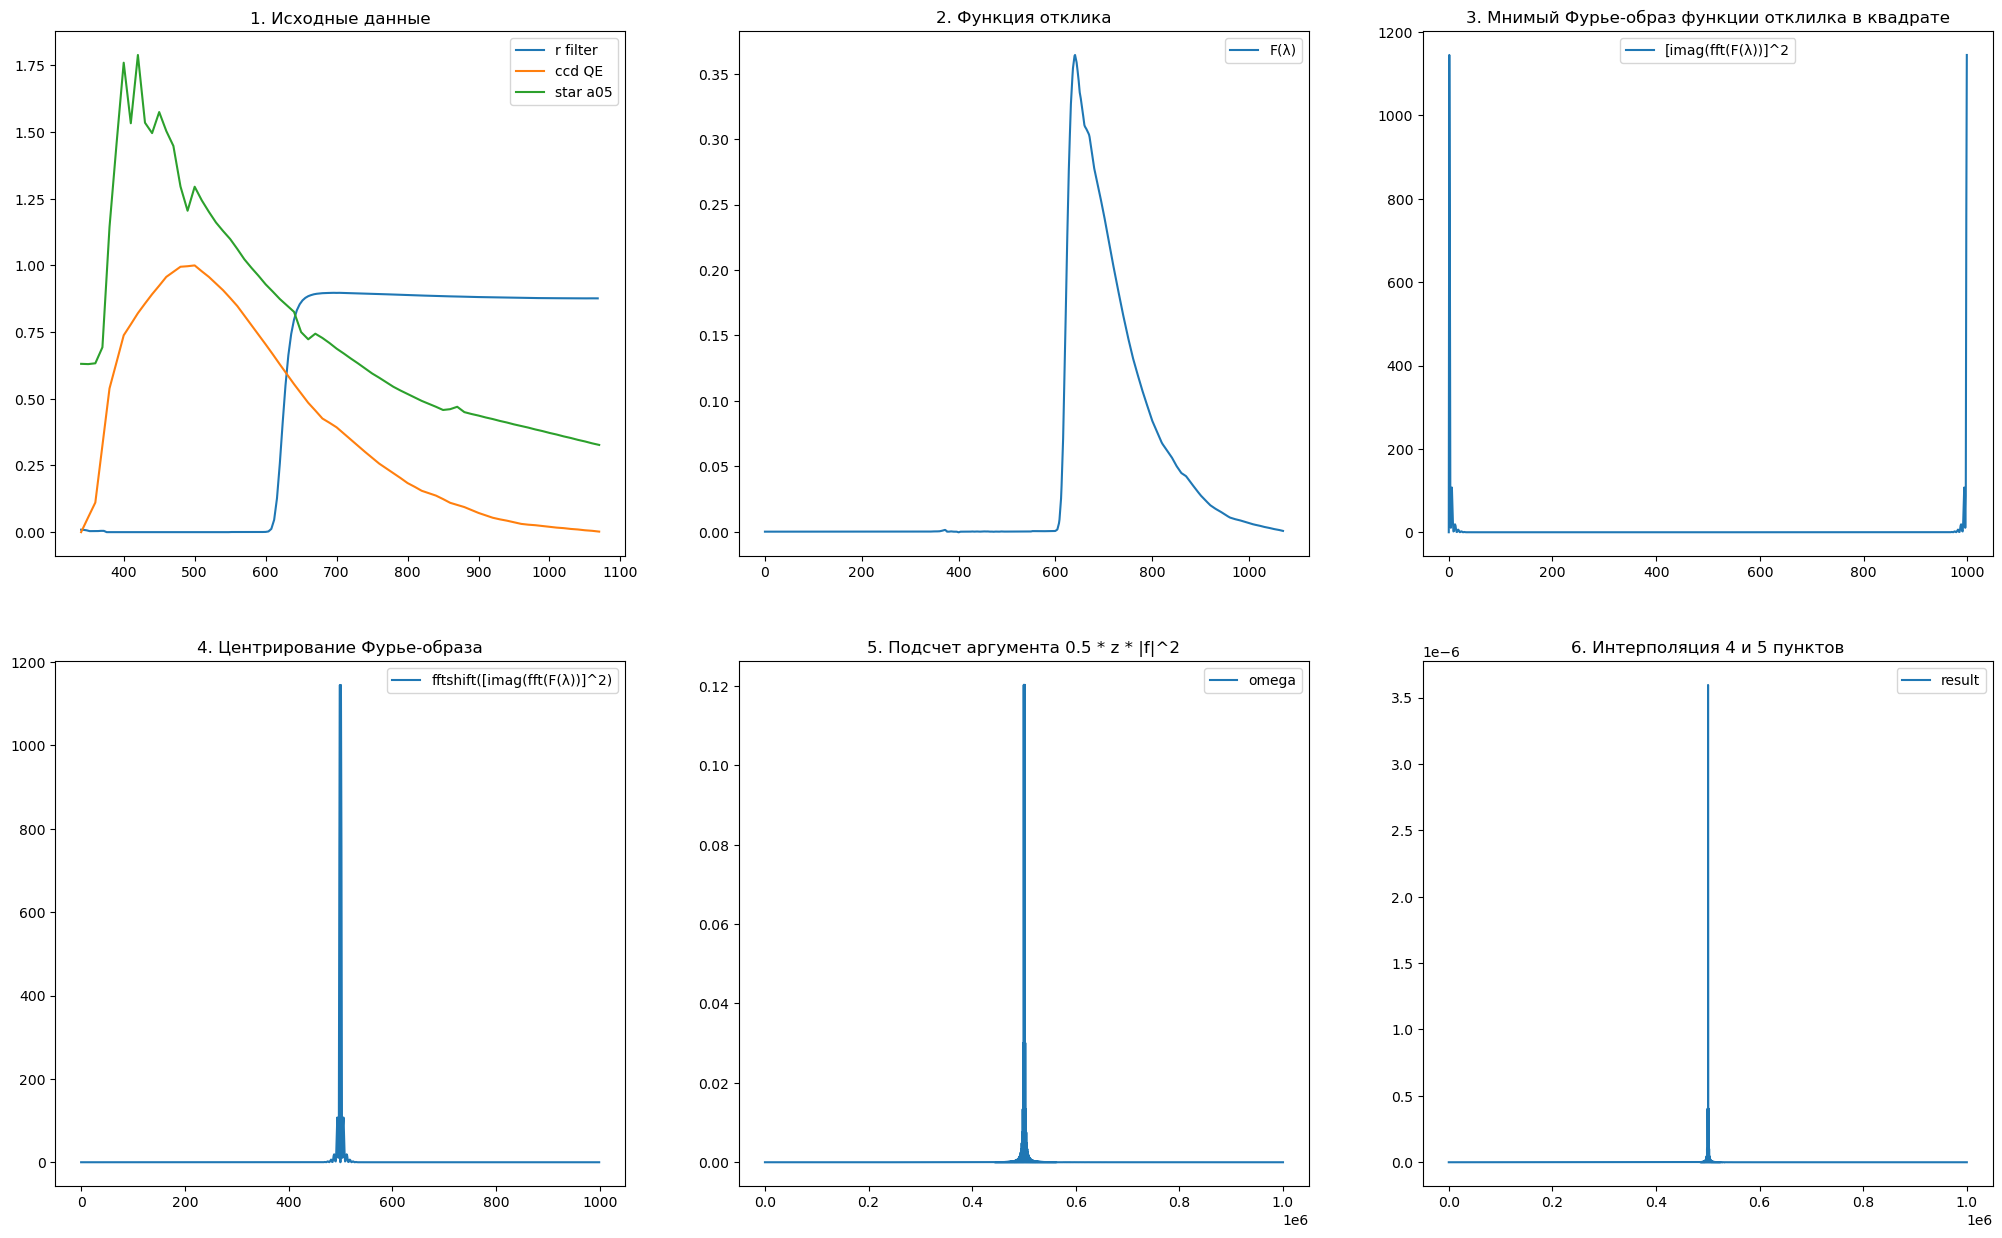

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("C:/Users/miron/Downloads/KC19_d16t4_Safonov.csv", sep = ';')
df['14.42.43'] = df['14.42.43'] / 100

ccd = pd.read_csv("C:/Users/miron/Downloads/ccd_prosilica2.crv", sep = ' ')
ccd['X'] = ccd['X'] * 1000

a05 = pd.read_csv("C:/Users/miron/Downloads/a05.sp", sep = ' ')

# на данном этапе мы обрезаем значения файлов так, чтобы они покрывались всеми тремя файлами
tmp_min = np.max([ccd['X'][0], a05['X'][0], df['WAVE_LENGTH'][0]])
tmp_max = np.min([ccd['X'].iat[-1], a05['X'].iat[-1], df['WAVE_LENGTH'].iat[-1]])

df = df[df['WAVE_LENGTH'] < tmp_max]
X1 = df['WAVE_LENGTH']
Y1 = df['14.42.43']

ccd = ccd[ccd['X'] > tmp_min]
X2 = ccd['X']
Y2 = ccd['Y']

a05 = a05[a05['X'] > tmp_min]
X3 = a05['X']
Y3 = a05['Y']

# т.к. разбивка по осям отличается, нужно свести их к одной, потому что далее мы будем перемножать значения, чтобы
# определить функцию спектрального отклика
lambdas = np.linspace(0, tmp_max, 1000)
interpolate_df = np.interp(lambdas, X1, Y1)
interpolate_ccd = np.interp(lambdas, X2, Y2)
interpolate_a05 = np.interp(lambdas, X3, Y3)
result = interpolate_df * interpolate_ccd * interpolate_a05

# мнимая часть Фурье преобразования от функции спектрального отклика
res_fft = pow((np.imag(np.fft.fft(result))), 2)
res_fft = list(res_fft)
res_fft_shifted = np.fft.fftshift(res_fft)

z = 2000
nx = 1000
D = 2.5
f_scale = 228/(D*nx) 
xx, yy = np.meshgrid(np.linspace(-nx//2, nx//2-1, nx), np.linspace(-nx//2, nx//2-1, nx))
xx_scale = f_scale * xx 
yy_scale = f_scale * yy
f_abs = xx_scale**2+yy_scale**2
omega = pow(np.ravel(0.5 * z * f_abs), -1)
omega = list(omega)

filter_ = np.interp(omega, lambdas, res_fft_shifted)
filter_ = list(filter_)


fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(25, 15))

ax1.plot(X1, Y1, label = 'r filter')
ax1.plot(X2, Y2, label = 'ccd QE')
ax1.plot(X3, Y3, label = 'star a05')
ax1.legend()
ax1.set_title('1. Исходные данные')

ax2.plot(lambdas, result, label = 'F(λ)')
ax2.legend()
ax2.set_title('2. Функция отклика')

ax3.plot(res_fft, label = '[imag(fft(F(λ))]^2')
ax3.legend()
ax3.set_title('3. Мнимый Фурье-образ функции отклилка в квадрате')

ax4.plot(res_fft_shifted, label = 'fftshift([imag(fft(F(λ))]^2)')
ax4.legend()
ax4.set_title('4. Центрирование Фурье-образа')

ax5.plot(omega, label = 'omega')
ax5.legend()
ax5.set_title('5. Подсчет аргумента 0.5 * z * |f|^2')

ax6.plot(filter_, label = 'result')
ax6.legend()
ax6.set_title('6. Интерполяция 4 и 5 пунктов')

# fig.savefig('C:/astro/Response_func.png', bbox_inches='tight')

In [ ]:
# ccd = pd.read_csv("C:/Users/miron/Downloads/ccd_prosilica2.crv", sep = ' ')
# ccd

In [ ]:
# a05 = pd.read_csv("C:/Users/miron/Downloads/a05.sp", sep = ' ')
# a05

In [ ]:
# result = a05 * ccd
# result